#### 设置工作区

In [1]:
# 设置工作区
import os
# 设置工作目录为项目根目录
os.chdir('../..')

#### 导入Adult数据集并用dataframe查看格式

In [2]:
from ucimlrepo import fetch_ucirepo 
import json
import pandas as pd
  
# fetch dataset 
adult = fetch_ucirepo(id=2) 

pd.DataFrame(adult.variables)

,name,role,type,demographic,description,units,missing_values
0,age,Feature,Integer,Age,N/A,None,no
1,workclass,Feature,Categorical,Income,"Private, Self-emp-not-inc, Self-emp-inc, Feder...",None,yes
2,fnlwgt,Feature,Integer,None,None,None,no
3,education,Feature,Categorical,Education Level,"Bachelors, Some-college, 11th, HS-grad, Prof-...",None,no
4,education-num,Feature,Integer,Education Level,None,None,no
5,marital-status,Feature,Categorical,Other,"Married-civ-spouse, Divorced, Never-married, S...",None,no
6,occupation,Feature,Categorical,Other,"Tech-support, Craft-repair, Other-service, Sal...",None,yes
7,relationship,Feature,Categorical,Other,"Wife, Own-child, Husband, Not-in-family, Other...",None,no
8,race,Feature,Categorical,Race,"White, Asian-Pac-Islander, Amer-Indian-Eskimo,...",None,no
9,sex,Feature,Binary,Sex,"Female, Male.",None,no


In [3]:
X = adult.data.features 
df_X = pd.DataFrame(X)
df_X.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


#### 取1000个试试水

In [4]:
# 取1000条数据
df_X = df_X[:1000]
df_X.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [5]:
# 制定映射规则，全都转为数值型
# 只取age, education-num, capital-gain, capital-loss, hours-per-week列
input_X = df_X.iloc[:, [0, 4, 10, 11, 12]]
# input_X转为ndarray
input_X = input_X.values
# input_X

In [6]:
y = adult.data.targets
df_y = y['income'].str.strip().str.rstrip('.')
# 制定df_y的映射规则
map = {'<=50K': 0, 
       '>50K': 1}
input_y = df_y.map(map).values
input_y = input_y[:1000]
# input_y

#### 根据数据集特征，创建类，并构建邻接矩阵

In [7]:
nodes = []
index = 0
from src.AdultNode import Node, Graph

for df, y in zip(input_X, input_y):
    node = Node(df, y, index)
    nodes.append(node)
    index += 1

Text(0.5, 1.0, 'Adult dataset: Initial Distribution')

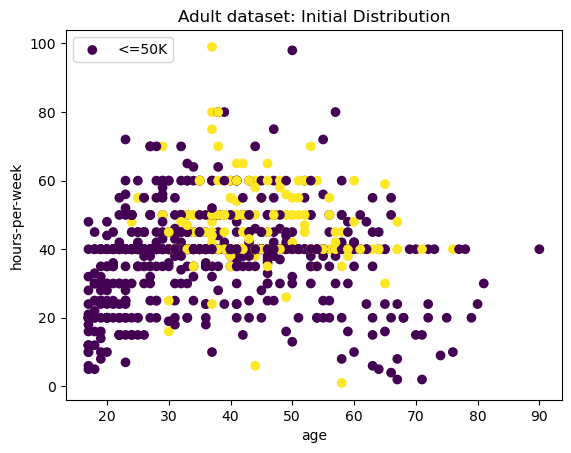

In [8]:
%matplotlib inline
from matplotlib import pyplot as plt
# age, education-num, capital-gain, capital-loss, hours-per-week
plt.scatter(input_X[:, 0], input_X[:, 4], c=input_y)
# 图例
plt.legend(['<=50K', '>50K'], loc='upper left')
# 横轴名称：age， 纵轴名称：hours-per-week
plt.xlabel('age')
plt.ylabel('hours-per-week')
# 标题：Adult dataset: Initial Distribution
title = 'Adult dataset: Initial Distribution'
plt.title('Adult dataset: Initial Distribution')

#### 构建图

In [9]:
graph = Graph(nodes, 5)
adjacency_matrix = graph.get_adjacency_matrix()

#根据邻接矩阵获取所有的二元组，如：[(0, 1), (0, 2), (1, 2)]
edges = graph.get_edges()

from src.deepwalk import deepwalk
nx = graph.to_nx()
# print(nx.nodes)
embeddings = deepwalk(nx, walk_length = 60, num_walks= 200, dim = 32)
# embeddings

[[505, 382, 478, 75, 703, 277, 437, 913, 681, 754, 439, 275, 236, 275, 659, 785, 109, 181, 791, 275, 540, 667, 791, 48, 791, 305, 320, 57, 646, 554, 856, 57, 856, 91, 551, 628, 547, 352, 440, 318, 655, 456, 748, 607, 71, 607, 107, 543, 199, 344, 570, 832, 869, 673, 584, 4, 964, 291, 104, 49], [591, 591, 591, 591, 591, 591, 591, 591, 591, 591, 591, 591, 591, 591, 591, 591, 591, 591, 591, 591, 591, 591, 591, 591, 591, 591, 591, 591, 591, 591, 591, 591, 591, 591, 591, 591, 591, 591, 591, 591, 591, 591, 591, 591, 591, 591, 591, 591, 591, 591, 591, 591, 591, 591, 591, 591, 591, 591, 591, 591], [64, 625, 64, 425, 775, 851, 364, 30, 391, 188, 821, 512, 290, 166, 911, 330, 19, 362, 330, 258, 980, 193, 287, 599, 569, 806, 98, 645, 216, 645, 216, 968, 81, 447, 98, 987, 508, 249, 491, 443, 439, 590, 950, 374, 373, 332, 806, 842, 117, 987, 249, 339, 150, 659, 791, 320, 877, 437, 151, 703], [365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365

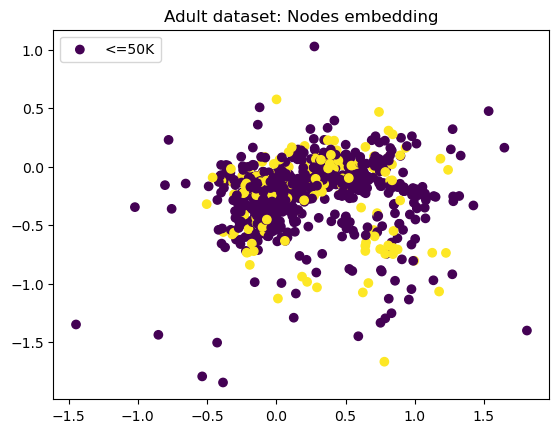

In [10]:
# 随便取两个维度看看
x = [embedding[0] for embedding in list(embeddings.values()) if(embedding is not None)]
y = [embedding[1] for embedding in list(embeddings.values()) if(embedding is not None)]

label = [node.label for node in nodes if(embeddings[str(node.index)] is not None)]

# 创建散点图
plt.scatter(x, y, c=label)
plt.legend(['<=50K', '>50K'], loc='upper left')
plt.title('Adult dataset: Nodes embedding')
plt.savefig('./images/DeepWalk/' + 'Adult_Nodes_embedding.png')
plt.show()

#### PCA降维

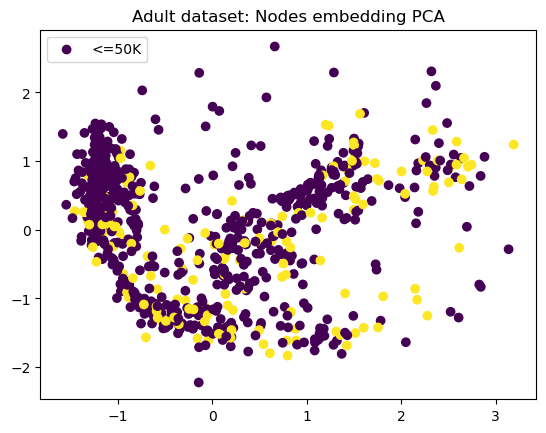

In [11]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# 先drop掉None
embeddings = {key: value for key, value in embeddings.items() if value is not None}
# 假设embeddings是一个字典，其中包含嵌入值
embeddings_value = list(embeddings.values())

# 使用PCA进行降维
pca = PCA(n_components=2)
pca.fit(embeddings_value)
X_pca = pca.transform(embeddings_value)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=label)
plt.legend(['<=50K', '>50K'], loc='upper left')
plt.title('Adult dataset: Nodes embedding PCA')
plt.savefig('./images/DeepWalk/' + 'Adult_Nodes_embedding_PCA.png')
plt.show()
